# Plotting with Matplotlib
---
Notebook by Alice Hsu (Oct 2025), with adapted examples from prior UEA Python PPDs

Concepts covered:
* Subplots
* Line plots
* Scatter plots
* Histograms/Violin plots
* Contours and heatmaps
    * Gridded data and `meshgrid()`
---

<img src="figures/mpl_logo2_compressed.svg" style="height:80%; width:75%;">


# Introduction

Matplotlib is a **Python plotting library** for producing publication quality figures. 
* It is the most widely used plotting package in Python. You can make:
    * line plots
    * scatter plots
    * pie charts
    * bar charts
    * histograms
    * 2D and 3D plots
    * maps
    * ...and more!
* Matplotlib has **very in-depth online documentation**:
    * Detailed descriptions of **different plot types and how to create them**: [matplotlib.org](https://matplotlib.org/index.html)
    * Many **useful examples** in the [gallery](https://matplotlib.org/gallery.html) that you can **copy-paste** from
    * If you can't find exactly what you need, there's most likely a **Stack Overflow** post for your problem.
    * Free [cheatsheet](https://github.com/matplotlib/cheatsheets)

In [30]:
import matplotlib.pyplot as plt    # most of the time, pyplot is the only matplotlib submodule we need.
import numpy as np
import pandas as pd

# we'll need numpy and pandas to create and read some data to plot.

To be efficient with matplotlib, you first need to understand its **terminology**:

# Anatomy of a Matplotlib Figure

## Figure, Axes or Axis? 
* The **figure** is the **whole image**, the top-level 'container' that holds all the pieces ("objects") of your figure.
* The **axes** is the part of a **figure** where you actually plot your data and control how your data is displayed. For example, you use the axes to:
    * Set the **data limits**
    * Set **tick marks** and their **labels**
    * Set **axes labels**
    * Set **subplot titles**
    * Customize your plot, e.g., **colors/colormaps, line widths, marker shapes, etc**.
* A **figure** can have multiple **axes** - for example, two subplots on a single figure.
<img src="figures/matplotlib_figure_parts.png" style="height:80%; width:80%;">

There are several ways to create the same plot with Matplotlib. For example, the following lines of code all produce the same thing:

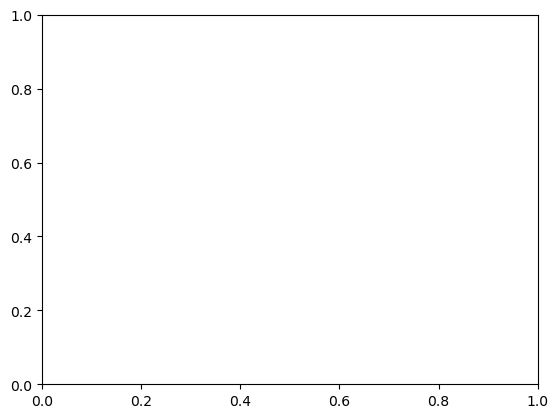

In [31]:
fig = plt.figure() # Create a figure
axes = fig.add_subplot() # add one Axes to Figure

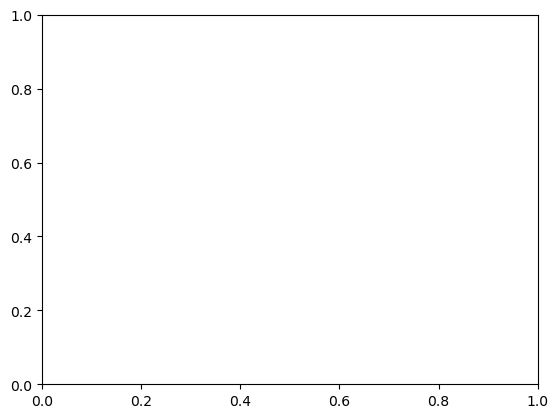

In [32]:
axes = plt.subplot()

However, the most flexible option is `fig, ax = plt.subplots()`, so we will be using this one through the rest of the notebook.

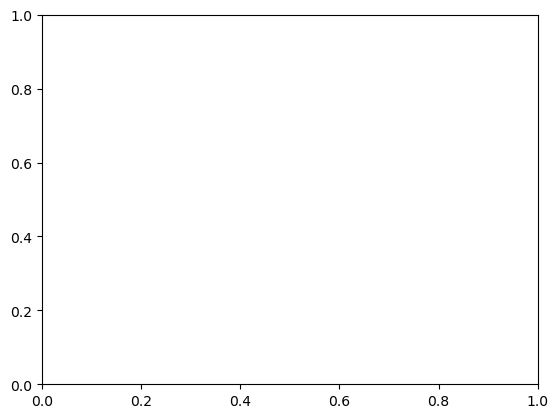

In [33]:
fig, ax = plt.subplots()

## Multiple Subplots

Note that you can **create multiple subplots** by simply specifying numbers in the parentheses of `plt.subplots()`.
    
   * The **first number in `plt.subplots()`** represents the **number of rows**.
   * The **second number in `plt.subplots()`** represents the **number of columns**.

For example:

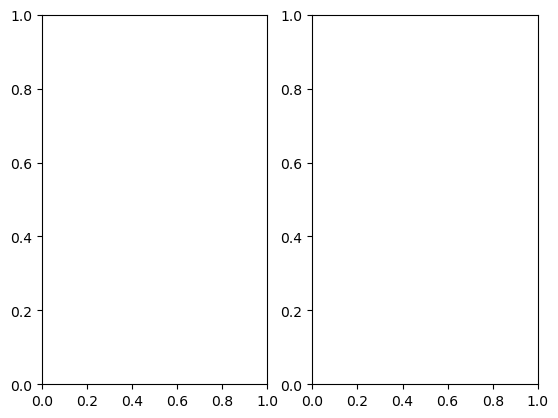

In [34]:
fig, axs = plt.subplots(1,2)

You can also change the figure size to accommodate the number of subplots using the `figsize` argument.
* The **first number in `figsize`** represents the **width of the row**.
* The **second number in `figsize`** represents the **height of the column**.

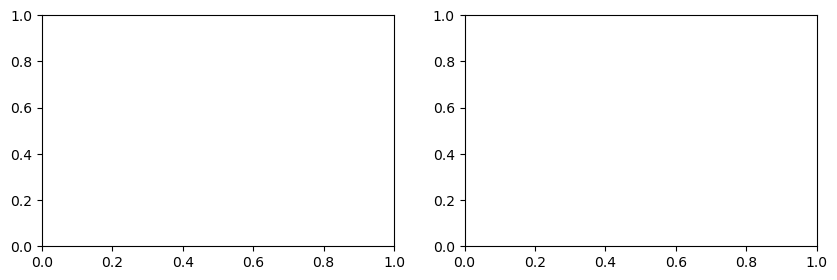

In [36]:
fig, axs = plt.subplots(1,2,figsize=(10,3))

You can also create a **grid of subplots**.

In this example below, we have **6 total subplots** in **2 rows** and **3 columns**.

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

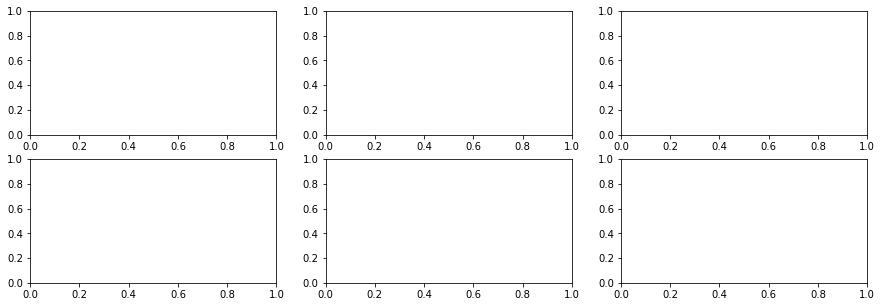

In [38]:
fig, axs = plt.subplots(2,3,figsize=(15,5))

Note that if you create a **2x3 grid of subplots**, then `axs` is a **2x3 array** containing **6 axes**:

In [40]:
axs

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

Note that to **access a specific axes** within the grid of subplots, you have to **specify an index** for the **row** and the **column**:

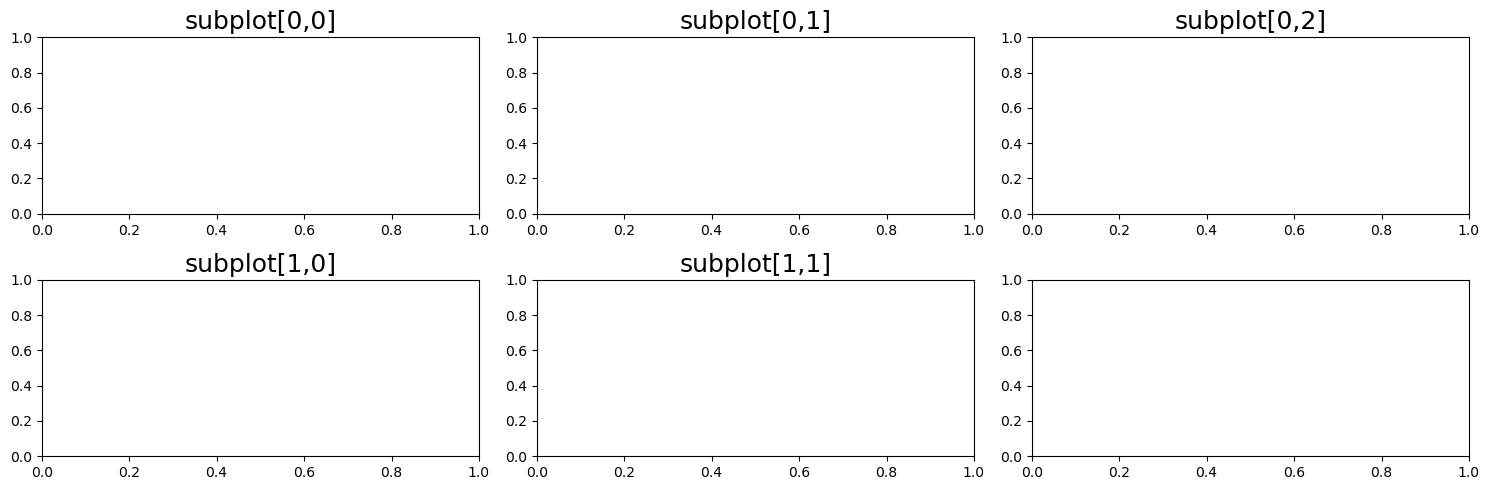

In [3]:
fig, axs = plt.subplots(2,3,figsize=(15,5))
axs[0,0].set_title('subplot[0,0]', fontsize=18);
axs[0,1].set_title('subplot[0,1]', fontsize=18);
axs[0,2].set_title('subplot[0,2]', fontsize=18);
axs[1,0].set_title('subplot[1,0]', fontsize=18);
axs[1,1].set_title('subplot[1,1]', fontsize=18);

plt.tight_layout()

<span style="color:blue"><u>**Exercise 0:**</u>
    
How would you add a title to the subplot on the bottom right?

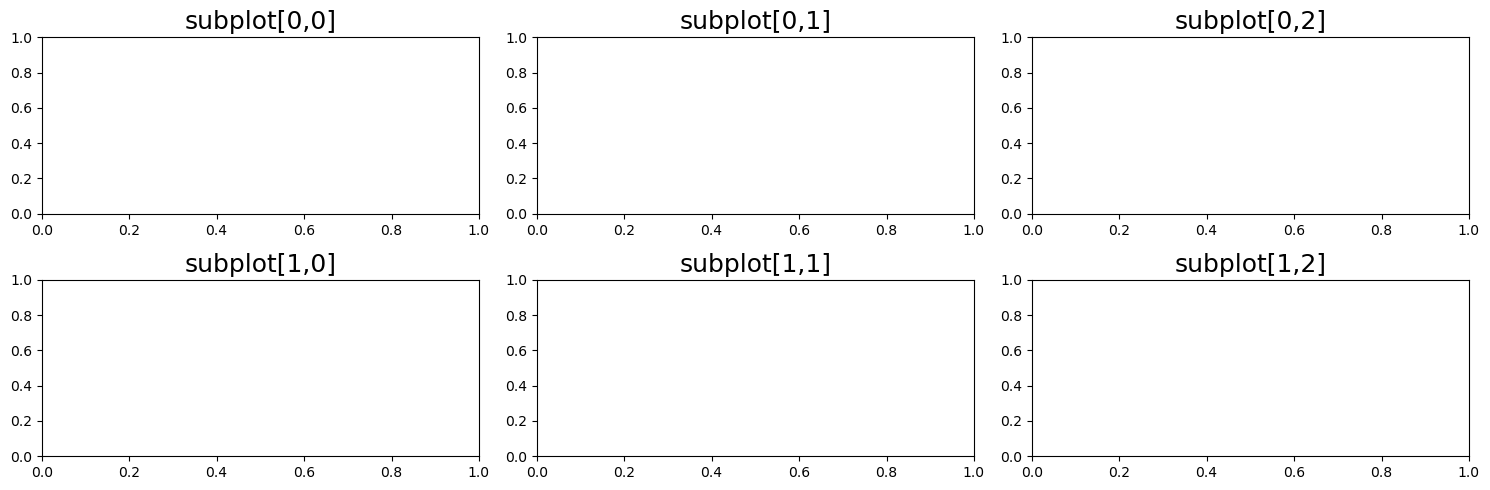

In [39]:
fig, axs = plt.subplots(2,3,figsize=(15,5))
axs[0,0].set_title('subplot[0,0]', fontsize=18);
axs[0,1].set_title('subplot[0,1]', fontsize=18);
axs[0,2].set_title('subplot[0,2]', fontsize=18);
axs[1,0].set_title('subplot[1,0]', fontsize=18);
axs[1,1].set_title('subplot[1,1]', fontsize=18);

#### YOUR CODE HERE ####
axs[1,2].set_title('subplot[1,2]', fontsize=18);

plt.tight_layout()

(The `plt.tight_layout()` line just tells Matplotlib to tidy up the layout so that the plots don't overlap with the plot titles.)

# Creating your first plot: Line plots

## Creating and Adding Data to Line Plots

Note that the key to successfully creating any plot in Python is deciphering **what inputs** the plotting functions take and what **format** the data needs to be in.

We will create our first plot using the **`plot()`** function, which creates a simple **line plot**.

To use the **`plot()`** function ([documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)), it looks like we need to specify an **x** and a **y** as **inputs**:

<img src="figures/matplotlib_plot_doc.png">

Additionally, it looks like **x** and **y** are generally **formatted** as 1D arrays.

Let's **create some data to plot**. Let's say our **x values** are:

In [41]:
x1 = np.array([2,4,6,8,10])
x1

array([ 2,  4,  6,  8, 10])

<span style="color:blue"><u>**Exercise 1:**</u>

Create a corresponding vector **`y1`** to plot as the y values. How many elements must **`y1`** have?

In [43]:
#### YOUR CODE HERE ####
y1 = 

To actually **plot the data** we've created in `x1` and `y1`, the syntax would be:

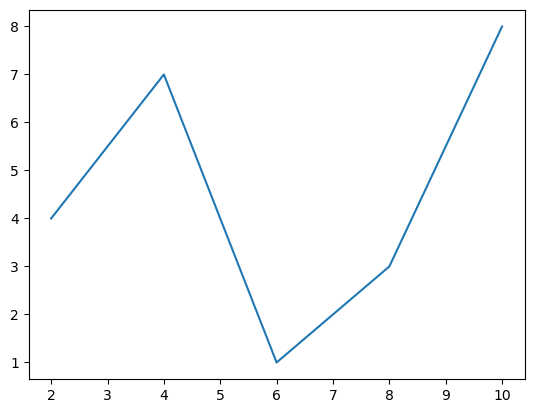

In [44]:
fig, ax = plt.subplots()  # creates one figure and one axes by default
ax.plot(x1,y1) # add the data onto the axes we just created

Congratulations! You've just created your first plot!

But now let's say we have a second dataset that we want to plot, stored in the variables `x2` and `y2`.

In [45]:
x2 = np.arange(0,10)
y2 = x2**2

print(x2)
print(y2)

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  4  9 16 25 36 49 64 81]


<span style="color:blue"><u>**Exercise 2**</u>:

How would we add `x2` and `y2` to the same figure (`fig`) and axes (`ax`)?

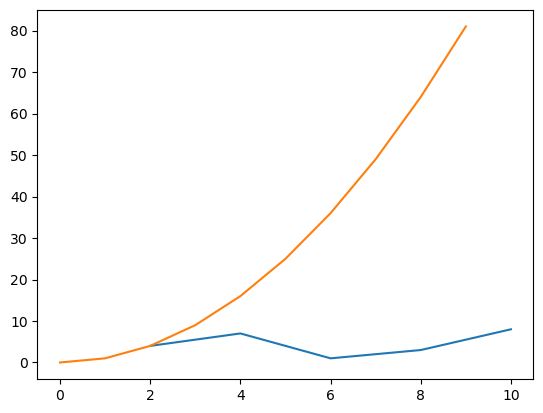

In [46]:
fig, ax = plt.subplots()  # creates one figure and one axes by default
ax.plot(x1,y1) # add the data onto the axes we just created

#### YOUR CODE HERE ####


Now, what if we wanted to plot our two datasets on **two separate subplots**?

First, let's create a **figure** with **two subplots**:

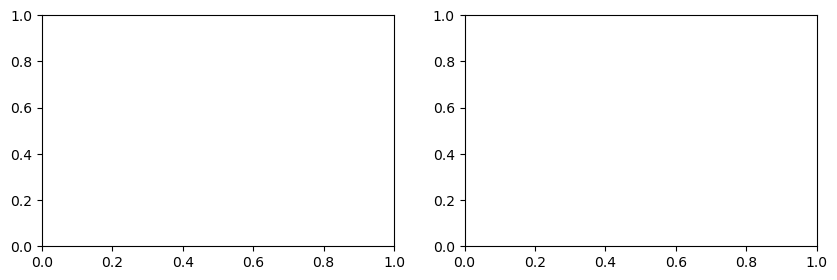

In [47]:
fig, axs = plt.subplots(1,2,figsize=(10,3)) # creates one figure and one axes by default

Notice that we now have **multiple subplots** to choose from to plot our data on.

Let's take a look at the differences between the variables `axs` vs `ax` from above:

In [48]:
axs

array([<Axes: >, <Axes: >], dtype=object)

In [34]:
ax

<AxesSubplot:>

Notice that in this case, `axs` is an **array** containing **2 subplots**.

Thus, in order to add data to this figure, we need to **specify which subplot** we want to add the data to.

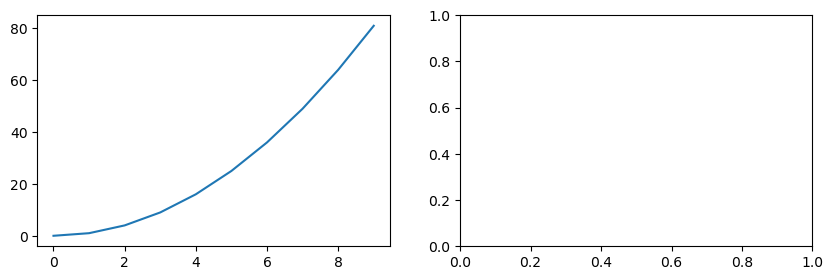

In [50]:
fig, axs = plt.subplots(1,2,figsize=(10,3))
axs[0].plot(x2,y2) # add the data onto the first axes (index 0) we just created

<span style="color:blue"><u>**Exercise 3**</u>:

Plot `x1` and `y1` on the first subplot. Then, plot `x2` and `y2` on the second subplot.

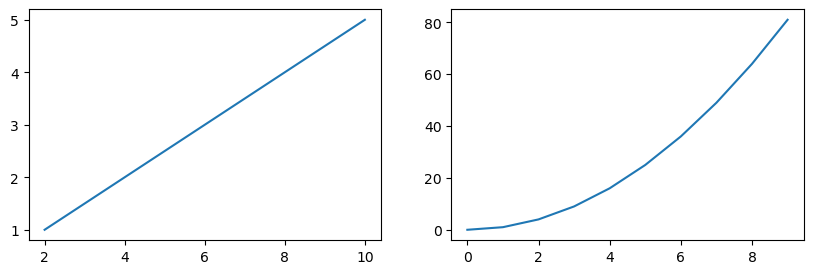

In [52]:
x1 = np.array([2,4,6,8,10])
y1 = x1/2

x2 = np.arange(0,10)
y2 = x2**2

fig, axs = plt.subplots(1,2,figsize=(10,3))

#### YOUR CODE HERE ####
axs[0].plot()


`plt.subplots()` is a function that creates a figure and a grid of subplots with a single call, while providing reasonable control over how the individual plots are created. 

## Customizing Styles and Appearances

When creating plots, you may want or need to **change the appearance** of the different parts of the figure. In this section, we'll look at **several common parameters you can customize** on your plots.

Let's start by first creating some data to plot. In this example, we will **plot two cosine waves** with different amplitudes **on the same subplot**.

First, we create the data:

In [53]:
# Create data using numpy: 
X = np.linspace(-np.pi,          # evenly spaced 1D array with 100 numbers from -pi
                np.pi, 20)      # to pi
Y1 = np.cos(X)                 # take the cosine of the array we just created
Y2 = 2*np.cos(X)               # take the cosine of the array we just created, multiplied by 2

In [56]:
print(X)
print(Y1)
print(Y2)

[-3.14159265 -2.81089869 -2.48020473 -2.14951076 -1.8188168  -1.48812284
 -1.15742887 -0.82673491 -0.49604095 -0.16534698  0.16534698  0.49604095
  0.82673491  1.15742887  1.48812284  1.8188168   2.14951076  2.48020473
  2.81089869  3.14159265]
[-1.         -0.94581724 -0.78914051 -0.54694816 -0.24548549  0.08257935
  0.40169542  0.67728157  0.87947375  0.9863613   0.9863613   0.87947375
  0.67728157  0.40169542  0.08257935 -0.24548549 -0.54694816 -0.78914051
 -0.94581724 -1.        ]
[-2.         -1.89163448 -1.57828102 -1.09389632 -0.49097097  0.16515869
  0.80339085  1.35456314  1.7589475   1.97272261  1.97272261  1.7589475
  1.35456314  0.80339085  0.16515869 -0.49097097 -1.09389632 -1.57828102
 -1.89163448 -2.        ]


<span style="color:blue"><u>**Exercise 4**</u>:

Add both the datasets (`X` and `Y1`, then `X` and `Y2`) to the same plot.

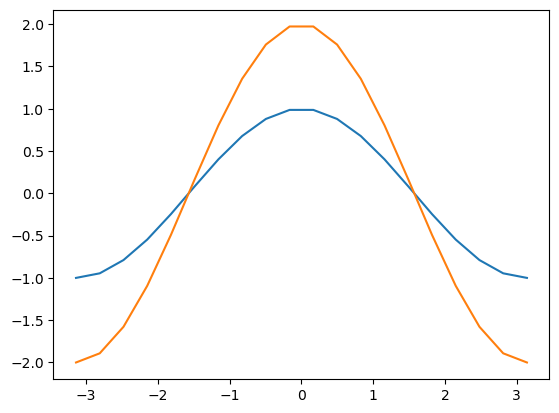

In [57]:
fig, ax = plt.subplots()   # calling subplots without any arguments creates one figure and one axes by default

### YOUR CODE HERE ###
ax.plot()


### Keyword Argument Settings

There are several **keyword arguments** you can specify within the `plot()` function to change the **appearance of the data** itself, including:
* **Line color** (`color`)
    * For some colors, you can simply set this equal to the name of the color as a string
    * Check the named colors [documentation](https://matplotlib.org/stable/gallery/color/named_colors.html) to **check which colors** this applies to.
    * For more precision, you can also set this argument equal to an RGB e.g., `color=[0.5,0.3,0.7]`
* **Transparency of color** (`alpha`)
* **Line width** (`linewidth`)
* **Line style** (`linestyle`)
    * Check the `linestyle` [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle) to check the **syntax for different line styles**.
* **Marker shape** (`marker`)
    * Check the `marker` [documentation](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers) to check the **syntax for different marker shapes**.
* **Marker size** (`markersize`)
* **Marker color** (`markerfacecolor`)

To set each of these appearances, simply **set each keyword argument equal to a valid value**. Note that some keyword arguments take strings as arguments, while others may take numbers.

<span style="color:blue"><u>**Exercise 5**</u>:

Add `X` and `Y2` to the plot below and customize its appearance such that
* There is an **orange, triangle shaped marker** at each point
* There is a **purple, dotted line** connecting each marker

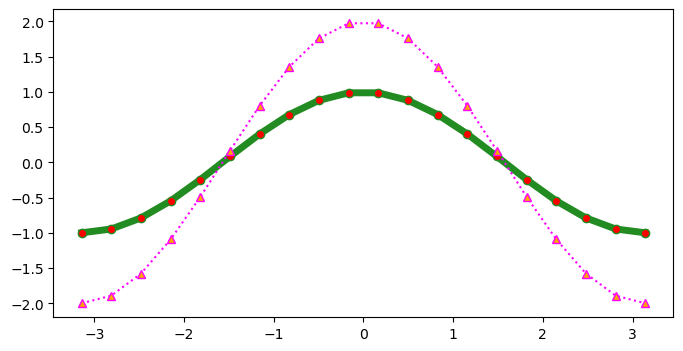

In [61]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X,Y1,color='forestgreen',marker='o',markerfacecolor='red',linewidth=5)

#### YOUR CODE HERE ####
ax.plot()

### Axis Settings Methods

In addition to keyword arguments for modifying the data's appearance, you can also change/set the **appearance of the axes** itself. Some examples include:
* **Subplot titles** (`set_title()`)
* **Labels of x- or y-axis** (`set_xlabel()`, `set_ylabel()`)
* **Limits of the x- or y-axis** (`set_xlim()`, `set_ylim()`)
* **Ticks on the x- or y-axis** (`set_xticks()`, `set_yticks()`)
* **_Labels_ of the _ticks_ on the x- or y- axis** (`set_xticklabels()`, `set_yticklabels()`)


* Note that for any text (titles, axes labels, tick labels), you can change the font size (`fontsize`) or font color (`fontcolor`) using keyword arguments within the respective functions.

To set each of these appearances, you must **specify the set of axes you want to modify** (if there is more than one). Then, **specify the inputs** that are required for each of the methods. Check the documentation to see what inputs are needed for each of the methods.

<span style="color:blue"><u>**Exercise 6**</u>:

Add `X` and `Y2` to the subplot on the right and
* Modify that subplot so that it has the **same x-ticks and y-ticks as the left subplot**.
* Give it a **title**.

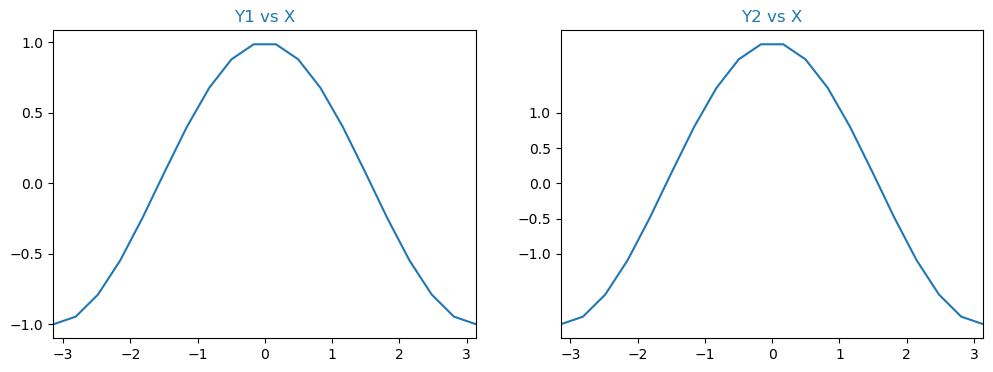

In [64]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(X,Y1)
axs[0].set_title('Y1 vs X',fontsize=12,color='tab:blue')
axs[0].set_xlim([-np.pi,np.pi]);
axs[0].set_yticks([-1,-0.5,0,0.5,1]);

#### YOUR CODE HERE ####
axs[1].plot()



### <span style="color:blue"><u>Challenge Exercise: GDP per Country</u> (10 min)

In this exercise, we will be **plotting the per capita GDP data for 5 different countries** for every year **between 2000-2020**.

The data has already been read in for you from the Excel sheet - just run the cell below!

In [65]:
years = np.arange(2000,2021)

GDP_data = pd.read_csv('data/GDP_data.csv',index_col=0).T

BRA = GDP_data['Brazil'].values
CHI = GDP_data['China'].values
EGY = GDP_data['Egypt, Arab Rep.'].values
FRA = GDP_data['France'].values
IND = GDP_data['India'].values

In [67]:
GDP_data

,Brazil,China,"Egypt, Arab Rep.",France,United Kingdom,India
2000,3766.548115,959.360431,1366.092744,22340.59395,28280.92679,442.750219
2001,3176.289357,1053.112314,1295.137418,22331.79483,27906.56950,450.357901
2002,2855.940189,1148.514257,1116.828846,24144.57270,30077.74143,469.149929
2003,3090.607010,1288.637491,1031.275563,29479.52221,34442.68754,544.143133
2004,3663.823188,1508.667916,991.255689,33644.92822,40366.88867,624.258827
2005,4827.781731,1753.414192,1104.803407,34696.37183,42104.78844,710.488080
2006,5934.144711,2099.219430,1298.979002,36431.56589,44512.45903,801.668354
2007,7409.691307,2693.958732,1547.741707,41486.19078,50397.68550,1021.887077
2008,8908.331766,3468.327063,1896.215943,45464.81814,47396.12021,992.519585
2009,8678.659225,3832.227457,2161.639646,41728.08842,38744.13169,1094.949746


In [66]:
print(years)
print(BRA)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020]
[ 3766.548115  3176.289357  2855.940189  3090.60701   3663.823188
  4827.781731  5934.144711  7409.691307  8908.331766  8678.659225
 11403.28213  13396.62436  12521.72135  12458.89121  12274.99397
  8936.196618  8836.286526 10080.50928   9300.661649  9029.833267
  7074.193783]


Create a line plot of each country's per capita GDP vs the year on the same subplot. After you have added each country's data, make the following modifications to your plot:
1. Create a **figure and axes** with **one subplot**.
    * Set the figure size to a size that is easily readable.
1. Add all the **countries' data** to the same subplot.
    * Think about: what goes on the x-axis? What goes on the y-axis?
1. Change the **line color** of each country's data to the following:
    * Brazil (green), China (red), Egypt (black), France (blue), India (orange)
1. Add an appropriate **title** to your plot.
2. Add an appropriate **x-axis label**.
3. Add an appropriate **y-axis label**.
4. Change the **x-axis limits** to the start and end year (2000 and 2020).
5. Change the **y-axis limits** so that all of the data is easily visible.
6. Change the **x-ticks** so that they only go in 5 year increments (i.e., 2000, 2005, 2010, etc).
7. Add a **legend** to your plot. You will need to find the documentation online. If the documentation is confusing, try looking at Stack Overflow!
    * Hint: It is best to use the keyword argument `label` within the `ax.plot()` function call.

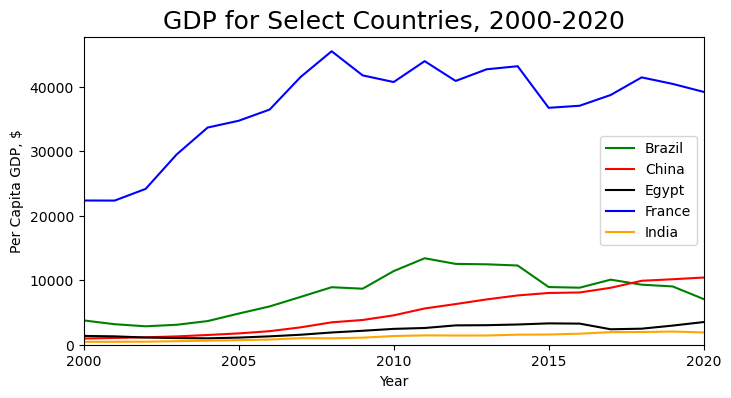

In [79]:
#### YOUR CODE HERE ####
fig,ax = plt.subplots(figsize=(8,4))

ax.plot()
ax.plot()
ax.plot()
ax.plot()
ax.plot()

# Other Plot Types in Matplotlib

## Scatter Plots

Scatter plots are similar to line plots in that they can represent 2D data. They are useful for exploratory analysis and looking for possible trends in your data.

For example, consider a **dataset** on **used cars and their prices**:

In [97]:
car_data = pd.read_csv('car_data.csv')
car_data

,price_inr,age_yr,mileage_km,transmission,color,engine_cc,seats,tank_size_l
0,515000,3,3395,Manual,Others,1086,5,35.0
1,610000,3,3800,Manual,White,998,4,55.0
2,625000,3,7000,Manual,Grey,1196,7,40.0
3,650000,3,6000,Manual,White,1197,5,37.0
4,700000,3,1000,Manual,White,1199,5,35.0
...,...,...,...,...,...,...,...,...
1875,1000000,15,67000,Automatic,Silver,1798,5,63.0
1876,1000000,15,127000,Manual,White,2982,7,80.0
1877,1150000,15,120000,Automatic,Silver,2987,5,80.0
1878,1195000,15,74000,Automatic,Silver,2497,5,70.0


Suppose you wanted to see whether there is a **relationship** between the **price of a used car** and its **mileage**. You might consider creating a **scatter plot** of the **price vs. mileage**.

To use the **`scatter()`** function ([documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter)), it looks like we need to specify an **x** and a **y** as **inputs**, similar to the line **`plot()`** function:

<img src="figures/scatter_doc.png" style="height:65%; width:50%;">

<span style="color:blue"><u>**Exercise 7:**</span>

Complete the code below to create a **scatter plot of the car price vs. the car mileage**.
* Put the **car mileage** on the **x-axis**.
* Put the **car price** on the **y-axis**.
* **Label the x-axis and y-axis** with appropriate labels and units.
    * The units are km for mileage and INR for price.

In [81]:
price_data = car_data['price_inr'].values
mileage_data = car_data['mileage_km'].values
print(price_data)
print(mileage_data)

[ 515000  610000  625000 ... 1150000 1195000 2400000]
[  3395   3800   7000 ... 120000  74000  34105]


Text(0, 0.5, 'Price, INR')

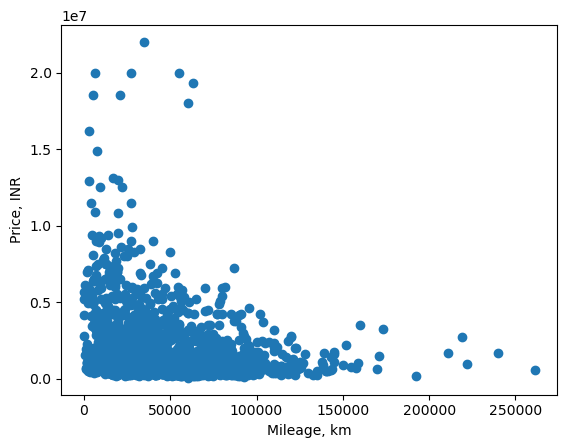

In [83]:
fig,ax = plt.subplots()

#### YOUR CODE HERE ####
ax.scatter()



Now, say we wanted to also look at how the **age of the car** affects the price of the car while still visualizing the price and mileage. With **`scatter()`**, we can add data to the **`c`** parameter to have this data represented by **color**.

<img src="figures/scatter_params.png" style="height:80%; width:50%;">

Note that we can **specify a colormap** with the **`cmap`** argument. You can look at the different colormap options [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html).

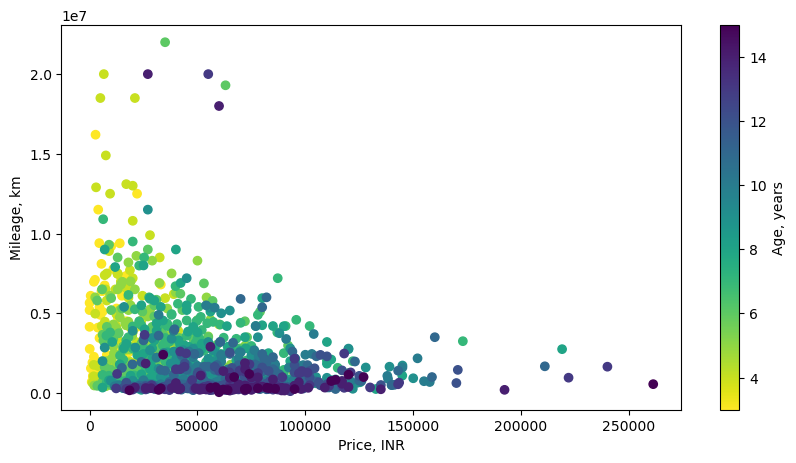

In [85]:
# Extract the data to plot
price_data = car_data['price_inr'].values
mileage_data = car_data['mileage_km'].values
age_data = car_data['age_yr'].values

# Create figure and axis
fig,ax = plt.subplots(figsize=(10,5))

# Plot data
# the c=age_data tells scatter() to code the age_data data as the colors
# the cmap='magma' tells scatter() to use a colormap called "viridis_r"
# the sc=ax.scatter() is needed to add a colorbar
sc = ax.scatter(mileage_data,price_data,c=age_data,cmap='viridis_r')

# Customize
ax.set_xlabel('Price, INR')
ax.set_ylabel('Mileage, km')

# Add a colorbar (called cax) to the scatter axes (called sc) on our figure (called fig)
cax = fig.colorbar(sc)

# Add label to colorbar
cax.set_label('Age, years')

<span style="color:blue"><u>**Exercise 8**</u>:

Create a scatterplot that displays the relationships between a **used car's mileage, price, and engine size (`engine_cc`)**.
* Experiment around with what goes on the **x-axis**, **y-axis**, and **color axis**. Some visualizations may look better than others!
* Add an appropriate **title** and **axes labels** to your plot.
* **Customize** your plot as you wish - you may choose the marker shape, marker size, color map, etc.
    * You may need to look at the `scatter()` [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html) to look at what **keyword arguments** you need to use. If you can't find it in the documentation, try Googling and looking for results on **Stack Overflow**.

In [90]:
car_data

,price_inr,age_yr,mileage_km,transmission,color,engine_cc,seats,tank_size_l
0,515000,3,3395,Manual,Others,1086,5,35.0
1,610000,3,3800,Manual,White,998,4,55.0
2,625000,3,7000,Manual,Grey,1196,7,40.0
3,650000,3,6000,Manual,White,1197,5,37.0
4,700000,3,1000,Manual,White,1199,5,35.0
...,...,...,...,...,...,...,...,...
1875,1000000,15,67000,Automatic,Silver,1798,5,63.0
1876,1000000,15,127000,Manual,White,2982,7,80.0
1877,1150000,15,120000,Automatic,Silver,2987,5,80.0
1878,1195000,15,74000,Automatic,Silver,2497,5,70.0


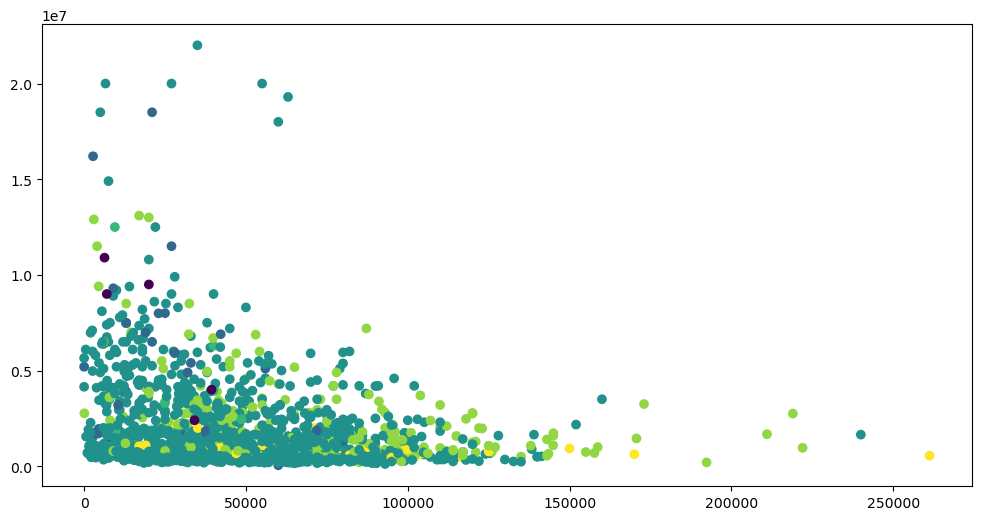

In [94]:
price_data = car_data['price_inr'].values
mileage_data = car_data['mileage_km'].values
engine_data = car_data['engine_cc'].values
seats_data = car_data['seats'].values

fig,ax = plt.subplots(figsize=(12,6))

#### YOUR CODE HERE ####
sc = ax.scatter()

cax = fig.colorbar(sc)

### `scatter()` Gallery

Below are some other examples of how scatter plots can be used:

<img src="figures/scatter_4D_example.png" style="height:70%; width:50%;">

<center>Dimensions represented: <b>Longitude</b> (x-axis); <b>Latitude</b> (y-axis); <b>Concentration, ppb</b> (color); <b>Number of measurements</b> (size)</center>


<img src="figures/scatter_4D_qual_example.png" style="height:90%; width:50%;">

## Bar Charts

**Bar charts** are useful for seeing how different quantities compare to one another. They are different from line or scatter plots because **one of the axes** can be **qualitative or categorical** data.

For example, consider the **used car dataset** that we were using above; suppose we counted up **how many cars of each color** there were and wanted to visualize them in a bar plot.

In [97]:
car_colors = car_data.groupby('color').size()
car_colors

color
Beige       5
Black     149
Blue      170
Bronze     26
Brown      79
Gold       25
Green      12
Grey      202
Maroon     33
Orange     16
Others     11
Purple      4
Red       143
Silver    267
White     732
Yellow      6
dtype: int64

To use the **`bar()`** function ([documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html)), it looks like we need to specify values for the **x-axis**, as well as the values in our data to represent the bar **heights**:

<img src="figures/bar_doc1.png" style="height:30%; width:60%;">
<img src="figures/bar_doc2.png" style="height:45%; width:60%;">

To plot this data using **`bar()`**, we put the **colors** on the x-axis and the **number of cars** as the heights:

C:\Users\alice\AppData\Local\Temp\ipykernel_20328\15920799.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(colors,rotation=45)


[Text(0, 0, 'Beige'),
 Text(1, 0, 'Black'),
 Text(2, 0, 'Blue'),
 Text(3, 0, 'Bronze'),
 Text(4, 0, 'Brown'),
 Text(5, 0, 'Gold'),
 Text(6, 0, 'Green'),
 Text(7, 0, 'Grey'),
 Text(8, 0, 'Maroon'),
 Text(9, 0, 'Orange'),
 Text(10, 0, 'Others'),
 Text(11, 0, 'Purple'),
 Text(12, 0, 'Red'),
 Text(13, 0, 'Silver'),
 Text(14, 0, 'White'),
 Text(15, 0, 'Yellow')]

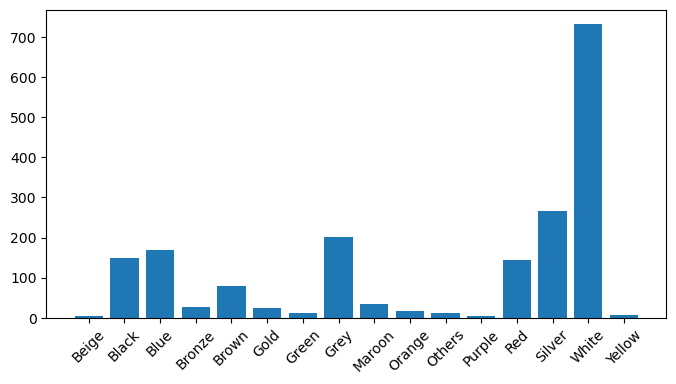

In [108]:
colors = car_colors.index
color_count = car_colors.values

fig,ax = plt.subplots(figsize=(8,4))
ax.bar(colors,color_count)

However, you may notice that the labels on the x-axis overlap and are difficult to read. How can we fix this?

<span style="color:blue"><u>**Exercise 9**</u> </span>:

One solution to the problem above is to **rotate the x-tick labels**.
* Use the **`set_xticklabels()`** method to rotate the x-tick labels. You may find this [Stack Overflow post](https://stackoverflow.com/questions/10998621/rotate-axis-tick-labels) useful.
    * You will need to use a keyword argument - the key is to figure out the keyword!
* Add appropriate **x- and y-axis labels**.
* Add any other **customizations** you'd like.
    * You can change the bar colors, add/change the bar outlines, add labels, etc. Look under Other Parameters on the **`bar()`** [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html) for more information.

In [ ]:
colors = car_colors.index
color_count = car_colors.values

fig,ax = plt.subplots(figsize=(8,4))
ax.bar(colors,color_count)

#### YOUR CODE HERE ####

ax.set_xticklabels()

## Histograms

**Histograms** are useful for visualizing the **frequency** of different values in a dataset. They may look similar to bar charts, but have the following differences:
* The **values on the x-axis represent bin edges**, where your data is sorted into these bins.
* The **bar heights represent the counts/frequencies of the values in your data**
* The resulting plot tells you about the **distribution of values in the dataset**.

As such, the input data for **`hist()`** is a different form than the input data for **`bar()`**.

To make a histogram with Matplotlib, we use the **`hist()`** function ([documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)). It looks like the **`hist()`** function only requires one input: **`x`**, or the data you want sorted into bins and plotted.

<img src="figures/hist_doc1.png" style="height:20%; width:80%;">
<img src="figures/hist_doc2.png" style="height:45%; width:80%;">

For example, say we wanted to look at the **distribution of the different used car prices** with a histogram - i.e., **how many used cars were sold at each price range?**

First, let's take a look at the data that goes into the **`hist()`** function.

**How does this data format differ from the data that went into the `bar()` function?**

In [8]:
price_data = car_data['price_inr'].values
price_data

array([ 515000,  610000,  625000, ..., 1150000, 1195000, 2400000],
      dtype=int64)

To plot the histogram, we simply put the data we want binned, **`price_data`**, into the **`hist()`** function:

(array([442., 573., 207., 163.,  87.,  71.,  58.,  47.,  36.,  37.,  19.,
         24.,  14.,  23.,  12.,  13.,  11.,   3.,   6.,   4.,   6.,   4.,
          1.,   0.,   2.,   0.,   2.,   0.,   2.,   3.,   0.,   0.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   2.,   1.,
          0.,   3.,   0.,   0.,   0.,   1.]),
 array([   49000.,   488020.,   927040.,  1366060.,  1805080.,  2244100.,
         2683120.,  3122140.,  3561160.,  4000180.,  4439200.,  4878220.,
         5317240.,  5756260.,  6195280.,  6634300.,  7073320.,  7512340.,
         7951360.,  8390380.,  8829400.,  9268420.,  9707440., 10146460.,
        10585480., 11024500., 11463520., 11902540., 12341560., 12780580.,
        13219600., 13658620., 14097640., 14536660., 14975680., 15414700.,
        15853720., 16292740., 16731760., 17170780., 17609800., 18048820.,
        18487840., 18926860., 19365880., 19804900., 20243920., 20682940.,
        21121960., 21560980., 22000000.]),
 <BarContainer object o

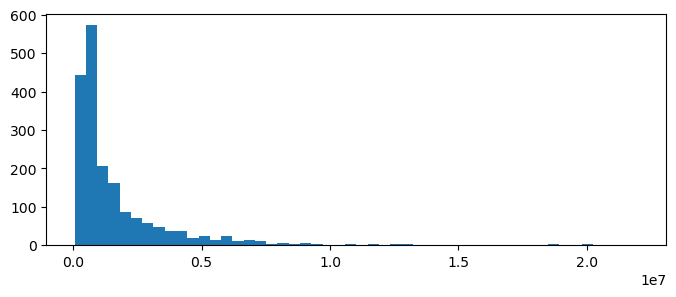

In [112]:
fig,ax = plt.subplots(figsize=(8,3))
ax.hist(price_data,bins=50)

<span style="color:blue"><u>**Exercise 10**</u></span>:

In the **`hist()`** function, you can also specify the **bins** you want on the histogram. Looking at the documentation in the images above, we can see that there are several ways to set this:

1. Specify the **number of bins** you want.
2. Specify the **bin edges** you want.

In the cell below, you will **create 2 histograms** of the **used car mileage data** on **two different subplots**.
* Add the **mileage data (`mileage_data`) to both axes (i.e., both subplots)** using the `hist()` function.
* On the first subplot, **set the bins to the number 20.**
* On the second subplot, **set the bins edges to go from 0 to 250,000 in increments of 25,000 km.**
    * You can type these out in a list (e.g., `[0, 25000, 50000, ...]`), or you can use the `range()` function.
* Make sure your plot has appropriate **x- and y-axis labels**.

Text(0, 0.5, 'number of cars')

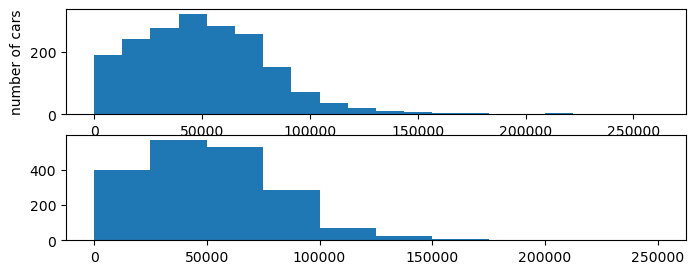

In [115]:
mileage_data = car_data['mileage_km'].values

fig,axs = plt.subplots(2,1,figsize=(8,3))

#### YOUR CODE HERE ####
axs[].hist()
axs[].hist()



## Box and Whisker/Violin Plots

Like histograms, **box and whisker and violin plots** are also useful for **visualizing the distribution of your data** as well as some **basic statistics** about it (e.g., mean, median, interquartile ranges (IQRs)). As such, their input data is very similar to the data format we used to plot the histograms.

To make a boxplot with Matplotlib, we use the **`boxplot()`** function ([documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html)). Similar to **`hist()`**, the **`boxplot()`** function only requires one input: **`x`**, or the data you want plotted.

<img src="figures/boxplot_doc1.png" style="height:28%; width:60%;">
<img src="figures/boxplot_doc2.png" style="height:45%; width:60%;">

As we can see from the documentation above, **`boxplot()`** function plots the **+/- 1.5 x interquartile ranges**, the **+/- interquartile ranges**, and the **median** of your data.

For example, if we wanted to **make a boxplot of the used car prices** to get an idea of its spread, we would simply put the data we want plotted into the **`boxplot()`** function:

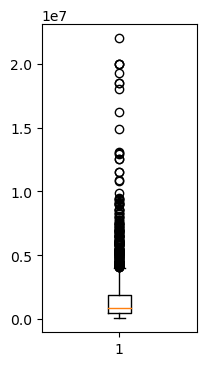

In [116]:
price_data = car_data['price_inr'].values

fig,ax = plt.subplots(figsize=(2,4))
ax.boxplot(price_data);

<span style="color:blue"><u>**Exercise 11**</u></span>:

In this exercise, you will make **4 separate box plots** of the **used car price**, **mileage**, **engine size**, and **tank size** on 4 different subplots.
* **Create a figure** (called `fig`) and **collection of axes** (called `axs`) with **4 subplots** in a single row (1 row, 4 columns).
    * Set the figure size (`figsize` keyword argument) to a size that accommodates all the data.
* Add the **different datasets** to each **subplot** (doesn't matter what order).
* Add appropriate **x-tick labels** to each subplot.
* Add appropriate **y-axis labels** to each subplot.
* Add a **super title** (a title that goes above all the subplots) to the figure using the **`fig.suptitle()`** method.

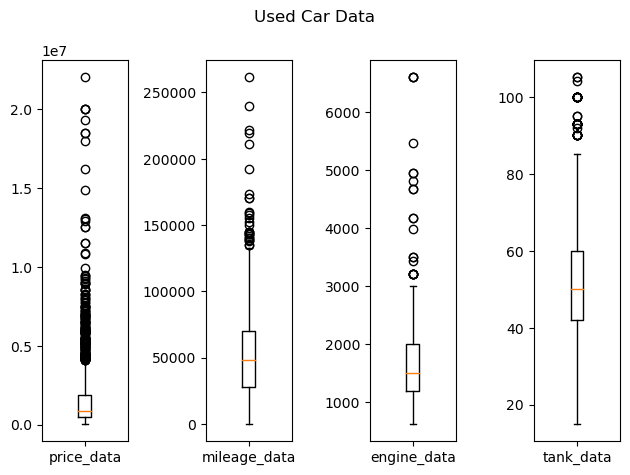

In [120]:
price_data = car_data['price_inr'].values
mileage_data = car_data['mileage_km'].values
engine_data = car_data['engine_cc'].values
tank_data = car_data['tank_size_l'].values

#### YOUR CODE HERE ####
fig,axs = plt.subplots()
axs[].boxplot()

fig.suptitle()

plt.tight_layout()

To make a violin plot with Matplotlib, we use the **`violinplot()`** function ([documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.violinplot.html)). Similar to **`boxplot`** and **`hist()`**, **`violinplot()`** only requires one input: **`dataset`**, or the data you want plotted.

<img src="figures/violin_doc1.png" style="height:40%; width:60%;">
<img src="figures/violin_doc2.png" style="height:25%; width:60%;">

For example, we can plot the same data (**used car price**, **mileage**, **engine size**, and **tank size**) as <span style="color:blue">Exercise 10</span> on **4 separate violin plots**.

You'll notice that the code is almost exactly the same as <span style="color:blue">Exercise 10</span> - we've just replaced `boxplot()` with `violinplot()`.

C:\Users\alice\AppData\Local\Temp\ipykernel_20328\3123227395.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(['price_data'])
C:\Users\alice\AppData\Local\Temp\ipykernel_20328\3123227395.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(['mileage_data'])
C:\Users\alice\AppData\Local\Temp\ipykernel_20328\3123227395.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(['engine_data'])
C:\Users\alice\AppData\Local\Temp\ipykernel_20328\3123227395.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[3].set_xticklabels(['tank_data'])


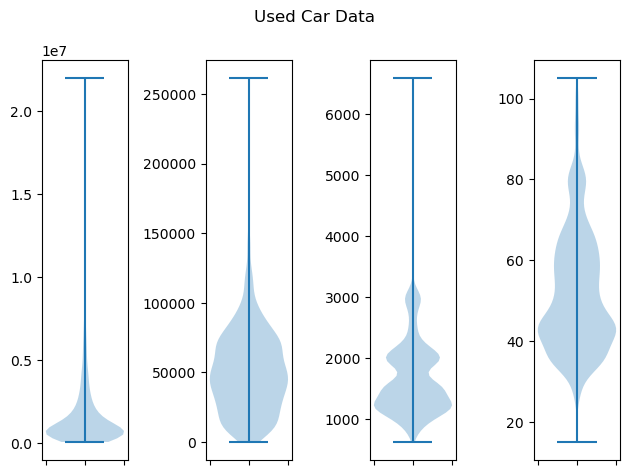

In [122]:
fig,axs = plt.subplots(1,4)
axs[0].violinplot(price_data)
axs[0].set_xticklabels(['price_data'])
axs[1].violinplot(mileage_data)
axs[1].set_xticklabels(['mileage_data'])
axs[2].violinplot(engine_data)
axs[2].set_xticklabels(['engine_data'])
axs[3].violinplot(tank_data)
axs[3].set_xticklabels(['tank_data'])

fig.suptitle('Used Car Data')

plt.tight_layout()

# Plotting in 3D

Sometimes, you may need to plot data spatially, with multiple dimensions. This is especially true if you have **gridded data**, e.g., a **value corresponding to a specific location** (e.g., a concentration at a coordinate (x,y)), or if you are working with **geospatial data** and **making maps**.

A few **Matplotlib functions** that all work similarly for plotting gridded data are:

* **`contour()`** and **`contourf()`**: draw contour lines and filled contours, respectively
* **`pcolor()`** and **`pcolormesh()`**: draw heatmaps

For simplicity, we will just focus on **`contourf()`**, since it takes a similar data input format as the other functions.

<img src="figures/contourf_doc1.png" style="height:20%; width:60%;">
<img src="figures/contourf_doc2.png" style="height:40%; width:60%;">

Technically, `contourf()` only requires you to specify **Z**, or the colors of your filled contour map.

Note that **Z** must be a **2D array** - i.e., it must have **M rows** and **N columns**.
* `contourf(Z)`
    * In this case, the coordinates (X and Y) are automatically set from 1 to n, where n is the size of your dataset (i.e., if Z is 50 x 100, then X goes from 1 to 50, and Y goes from 1 to 100).

Let's try this out on some made up data with some practical applications.

Consider a **3x7 array `C0`** containing surface measurements of an initial contaminant concentration data (in μM) for a lake that's 7 x 6 km$^2$.

You may recall this exercise from the Data Analysis course practical, <span style="color:darkorange"> Pollutant Concentrations in a Lake </span>.

||1km|2km|3km|4km|5km|6km|7km|
|-|-|-|-|-|-|-|-|
|**2km**|7|7|6|5.5|5|4|3|
|**4km**|9|8.5|8|8|7.5|6|5|
|**6km**|6|6|5.5|5|5|4|2|

First, let's create **`C0`** and the corresponding vectors **`x` and `y`**, representing the **horizontal and vertical distances** along the lake, respectively.

In [2]:
C0 = np.array([[7,7,6,5.5,5,4,3],
                [9,8.5,8,8,7.5,6,5],
                [6,6,5.5,5,5,4,2]])

x = np.arange(1,8)
y = np.array([2,4,6])

In this case, **`x`** is made up of values from **1 to 7** in **increments of 1**, while **`y`** is made of values from **2 to 6** in **increments of 2**.

In [7]:
print(x.shape)
print(y.shape)

(7,)
(3,)


Correspondingly, **`C0`** is a **3x7 array**, where each point represents a concentration in the lake.

In [4]:
C0.shape

(3, 7)

To make a **3D filled contour plot** of our data **`C0`**, we would simply write:

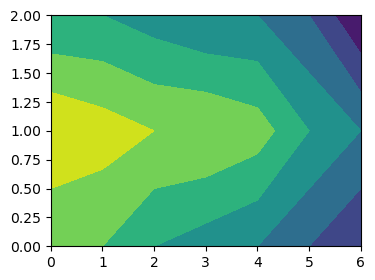

In [16]:
fig, ax = plt.subplots(figsize=(4,3))
ax.contourf(C0);

However, in many cases, you might want to **specify X and Y**. In the example above, our **x goes from 1 to 7**, and **y goes from 2 to 6** so ideally we'd like that represented in our plot.
* If you were trying to **plot a map**, you would want to set **X to represent your longitudes** and **Y to represent your latitudes**.

Since we want to specify **x and y**, we will use:
* `contourf(X,Y,Z)`

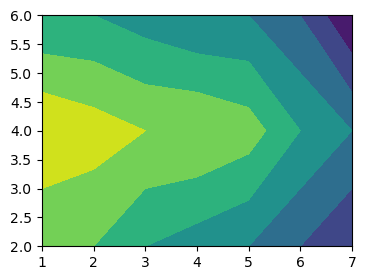

In [21]:
meshx,meshy = np.meshgrid(x,y) # This function will be explained further below

fig, ax = plt.subplots(figsize=(4,3))
ax.contourf(meshx,meshy,C0);

But what are **`meshx` and `meshy`**, and why can't we just use `x` and `y`?

Recall the line of code above that we used to create **`meshx`** and **`meshy`**. What exactly does `meshgrid()` do?

In [133]:
meshx,meshy = np.meshgrid(x,y)

Recall that the data we wanted to plot, **`C0`, is a 3x7 array**.

In [22]:
C0.shape

(3, 7)

Now if we take a look at the **shape of `meshx` and `meshy`**, you'll notice...

In [24]:
print(meshx.shape)
print(meshy.shape)

(3, 7)
(3, 7)


Let's compare the differences between **`x` and `y`** and **`meshx` and `meshy`**.

In [29]:
print('x:'+str(x.shape))
print(x)
print('meshx:'+str(meshx.shape))
print(meshx,'\n')

print('y:'+str(y.shape))
print(y)
print('meshy:'+str(meshx.shape))
print(meshy)

x:(7,)
[1 2 3 4 5 6 7]
meshx:(3, 7)
[[1 2 3 4 5 6 7]
 [1 2 3 4 5 6 7]
 [1 2 3 4 5 6 7]] 

y:(3,)
[2 4 6]
meshy:(3, 7)
[[2 2 2 2 2 2 2]
 [4 4 4 4 4 4 4]
 [6 6 6 6 6 6 6]]


What exactly is happening? Why are `meshx` and `meshy` just repeats of `x` and `y`, and why do we need this?

The reason is because **`C0` is a 3x7 array of data**, with 21 total data points that were calculated using all **21 (i.e., 3 x 7) possible combinations** of the values in `x` and `y`. As such, **every point within `C0` has a corresponding coordinate pair, (<span style="color:red">x</span>,<span style="color:blue">y</span>)**.

For example, the **first value in C0** corresponds to the value at the location **(1,2)**, or when **<span style="color:red">x = 1</span> and <span style="color:blue">y = 2</span>**.

<center><img src="figures/meshgrid_explanation_c0.png" style="height:90%; width:90%;">

### Colorbars

When plotting contours, we will often need a **colorbar**.

A **colorbar** has its own **`axes`**.

<img src="figures/colorbar_doc.png" style="height:35%; width:80%;">

<u>To add a colorbar to a figure:</u>
1. You must first **create a handle** for the plot on the axes, or make it "mappable"; for example, if you plotted our data `Z` on a filled contour using `contourf()` on an axes called `ax`:
<center><code>handle = ax.contourf(Z)</center></code>
2. Then, you **tell your figure `fig` that you want to add a colorbar to it** by calling the `colorbar()` method on it. Here, you also specify the axes' handle:
<center><code>fig.colorbar(handle)</center></code>
* Specifying the axes' handle **tells the colorbar what data the colorbar should follow**.

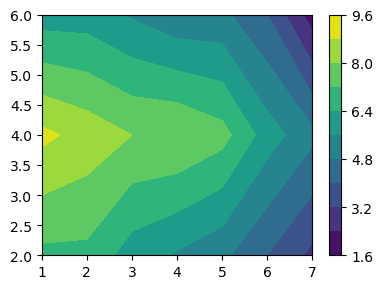

In [31]:
fig, ax = plt.subplots(figsize=(4,3))
handle = ax.contourf(meshx, meshy, C0, 10)
fig.colorbar(handle)

plt.tight_layout()

# Default sequantial and diverging colormaps

More info: [colormaps reference](https://matplotlib.org/stable/gallery/color/colormap_reference.html).

<img src="figures/colormaps_reference_00.png" >
<img src="figures/colormaps_reference_03.png" >

### Don't let bad colormaps mess with your science!
Also referred to as rainbow, jet is a problematic colormap that promotes bad science. To explore the reasons why, and to see examples of how jet hides craters on Mars and distorts photographs, go read [this blog post](https://titan.uio.no/english/2021/improper-use-colours-can-distort-scientific-data) or [this Nature Communications paper](https://www.nature.com/articles/s41467-020-19160-7). 

Python has great preceptually uniform default colormaps. If they're not quite what you want, check out more good colourmaps crafted for [oceanography](https://matplotlib.org/cmocean/) and [general science + geophysics](http://www.fabiocrameri.ch/colourmaps.php).
A good colormap is perceptually uniform, intuitively suits the data being plotted and is color deficient vision-friendly. 

# Challenge #1: Carbon Cycle $CO_2$ and $CH_4$ Data

In this exercise, we will put together some of the concepts we learned on:
* **Subplots**
* **Line plots**
* **Data formatting**

We will be using real data from the <b>NOAA ESRL Carbon Cycle Cooperative Global Air Sampling Network</b>.

In this dataset, we have **measurements of**:
  * Atmospheric carbon dioxide ($CO_2$), in ppm
  * Methane ($CH_4$), in ppb 
  * $\delta^{13}C/CO_{2}$, in per mil (‰)
  * $\delta^{13}C/CH_{4}$, in per mil (‰)
  
At **two different stations**:
  * CGO = Cape Grim, Tasmania, Australia
  * MHD = Mace Head, County Galway, Ireland
  
For **every month for certain years** between 1984 and 2018.
  

The data is formatted in a text file like this:    
    
```
    Station code | Year | Month | Measurement

    CGO            1984     4       341.63  
```

Source: https://www.esrl.noaa.gov/gmd/dv/data/

**Run the cell below to read in the data and format it for plotting**.

Don't worry too much about the details of the code - just make sure you understand the data format after running the cell!

In [155]:
# Read data to get all the datasets into arrays we can plot
# CO2 
from datetime import datetime
read_data_kwargs = dict(skiprows=68, usecols=(1, 2, 3), unpack=True)

cgo_co2_yr, cgo_co2_mn, cgo_co2_val = np.loadtxt('co2_cgo_surface-flask_1_ccgg_month.txt', 
                                                 **read_data_kwargs)
mhd_co2_yr, mhd_co2_mn, mhd_co2_val = np.loadtxt('co2_mhd_surface-flask_1_ccgg_month.txt', 
                                                 **read_data_kwargs)
# C13/C12 in CO2 (d13C (CO2))
cgo_co2c13_yr, cgo_co2c13_mn, cgo_co2c13_val = np.loadtxt('co2c13_cgo_surface-flask_1_sil_month.txt', 
                                                          **read_data_kwargs)
mhd_co2c13_yr, mhd_co2c13_mn, mhd_co2c13_val = np.loadtxt('co2c13_mhd_surface-flask_1_sil_month.txt', 
                                                          **read_data_kwargs)
# CH4
cgo_ch4_yr, cgo_ch4_mn, cgo_ch4_val = np.loadtxt('ch4_cgo_surface-flask_1_ccgg_month.txt', 
                                                 **read_data_kwargs)
mhd_ch4_yr, mhd_ch4_mn, mhd_ch4_val = np.loadtxt('ch4_mhd_surface-flask_1_ccgg_month.txt', 
                                                 **read_data_kwargs)
# C13/C12 in CH4 (d13C (CH4))
cgo_ch4c13_yr, cgo_ch4c13_mn, cgo_ch4c13_val = np.loadtxt('ch4c13_cgo_surface-flask_1_sil_month.txt',
                                                          **read_data_kwargs)
mhd_ch4c13_yr, mhd_ch4c13_mn, mhd_ch4c13_val = np.loadtxt('ch4c13_mhd_surface-flask_1_sil_month.txt', 
                                                          **read_data_kwargs)
# Get the datetime for all the timeseries
cgo_co2_time = [datetime(int(i), int(j), 1) for i, j in zip(cgo_co2_yr, cgo_co2_mn)]
mhd_co2_time = [datetime(int(i), int(j), 1) for i, j in zip(mhd_co2_yr, mhd_co2_mn)]

cgo_co2c13_time = [datetime(int(i), int(j), 1) for i, j in zip(cgo_co2c13_yr, cgo_co2c13_mn)]
mhd_co2c13_time = [datetime(int(i), int(j), 1) for i, j in zip(mhd_co2c13_yr, mhd_co2c13_mn)]

cgo_ch4_time = [datetime(int(i), int(j), 1) for i, j in zip(cgo_ch4_yr, cgo_ch4_mn)]
mhd_ch4_time = [datetime(int(i), int(j), 1) for i, j in zip(mhd_ch4_yr, mhd_ch4_mn)]

cgo_ch4c13_time = [datetime(int(i), int(j), 1) for i, j in zip(cgo_ch4c13_yr, cgo_ch4c13_mn)]
mhd_ch4c13_time = [datetime(int(i), int(j), 1) for i, j in zip(mhd_ch4c13_yr, mhd_ch4c13_mn)]

The variables you will be using for plotting are:

`
cgo_co2_time, cgo_co2_val
mhd_co2_time, mhd_co2_val
cgo_co2c13_time, cgo_co2c13_val
mhd_co2c13_time, mhd_co2c13_val
cgo_ch4_time, cgo_ch4_val
mhd_ch4_time, mhd_ch4_val
cgo_ch4c13_time, cgo_ch4c13_val
mhd_ch4c13_time, mhd_ch4c13_val
`

In this exercise, you will create a **2x2 set of subplots**. On **each subplot** will be the **time series of each different variable** in the dataset. The following steps should help you break it down:
1. Create a **figure and subplots with 2 rows and 2 columns**.
2. On the **top left subplot**, plot the **$CO_2$ concentrations** over time from both sites.
3. On the **top right subplot**, plot the **$CH_4$ concentrations** over time from both sites.
4. On the **bottom left subplot**, plot the **$C/CO_2$ values** over time from both sites.
5. On the **bottom right subplot**, plot the **$C/CH_4$ values** over time from both sites.
6. Add appropriate **x- and y- labels** with the correct units on every subplot.
7. Format the **x- and y- ticks** appropriately (you may need to **rotate** them).

Before you start, take a look at some of these different variables to get a sense of **how the data is formatted**.

In [ ]:
mhd_co2_time
mhd_co2_val

mhd_co2c13_time
mhd_co2c13_val

cgo_ch4_time
cgo_ch4_val

mhd_ch4_time
mhd_ch4_val

cgo_ch4c13_time
cgo_ch4c13_val

mhd_ch4c13_time
mhd_ch4c13_val

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


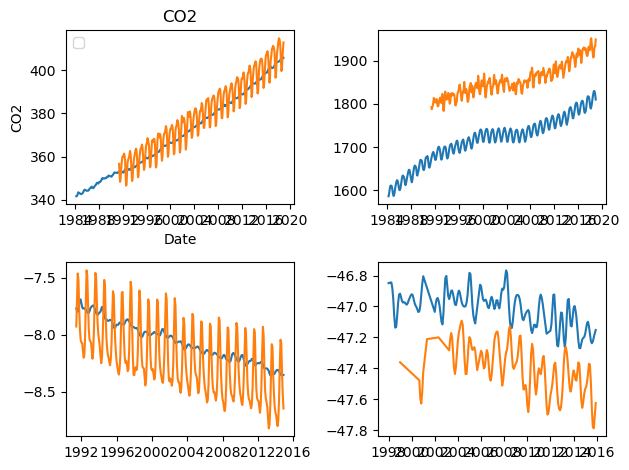

In [157]:
#### YOUR CODE HERE ####

# 1. Set up a grid of four subplots.
fig, axs = plt.subplots(2,2)

# 2. Plot the data from stations for the four variables measured. 

# 3. Set titles, x and y labels and add a legend.

plt.tight_layout()

# Challenge #2: Pollutant concentrations over time

In this exercise, we will put together some of the concepts we've learned on:
* **Subplots**
* **Filled contour (`contourf()`) plots**
* **3D formatting**

Recall the **initial pollutant concentration data** from the Plotting in 3D section, a **3x7 array `C0`** containing surface measurements of an initial contaminant concentration data (in μM) for a lake that's 7 x 6 km.

||1km|2km|3km|4km|5km|6km|7km|
|-|-|-|-|-|-|-|-|
|**2km**|7|7|6|5.5|5|4|3|
|**4km**|9|8.5|8|8|7.5|6|5|
|**6km**|6|6|5.5|5|5|4|2|

In [ ]:
C0 = np.array([[7,7,6,5.5,5,4,3],
                [9,8.5,8,8,7.5,6,5],
                [6,6,5.5,5,5,4,2]])

x = np.arange(1,8)
y = np.array([2,4,6])

Suppose the contaminant decays according to a first order reaction such that the concentration at a given time is given by the equation:

<center>$C(t) = C_0*e^{-k*t}$</center>

where _k_ = 0.01 $day^{-1}$, $C_0$ is the initial concentration (represented at each point in the lake by `C0`), and t is the time that has passed, in days.

**`C7`, `C14`, and `C21`** represent the pollutant concentrations in the lake after **7, 14, and 21 days**, respectively:

In [37]:
k = 0.01

C7 = C0*np.exp(-k*7)
C14 = C0*np.exp(-k*14)
C21 = C0*np.exp(-k*21)

In this exercise, you will create a figure with 1 row of 4 subplots that show the evolution of the pollutant concentration in the lake. The following steps should help you break the task down:

1. Create a **figure and subplots with 1 row and 4 columns**.
    * Set the figure size (`figsize`) to a readable size.
    * In this figure, all of our subplots will have the **same x and y ticks and limits** since we are plotting the same lake. Because of this, we will set **`sharex=True` and `sharey=True`** in the `plt.subplots()` - this means if we set the x and y ticks or limits on one subplot, it will **automatically set it for all the subplots**.
    
    
2. On the **first subplot**, use `contourf()` to plot the initial concentration in the lake, `C0`.    
3. On the **second subplot**, use `contourf()` to plot the concentration in the lake after 7 days, `C7`.
4. On the **third subplot**, use `contourf()` to plot the concentration in the lake after 14 days, `C14`.
5. On the **fourth subplot**, use `contourf()` to plot the concentration in the lake after 21 days, `C21`.

Note: _within `contourf()`, we set the color limits using `vmin` and `vmax`. This tells the plot to set the lowest color to 0, and the highest color to 9. We set this to the same values for all plots because we want to be able to compare them with each other. This has been done for you._


6. On each subplot, **set the x- and y- ticks** to correspond with the lake locations (you can use `x` and `y`).
7. On each subplot, **add a title** that tells you the **time point** represented in that plot.
    * For example, on the first plot, the title should be `'t = 0 days`'.
    
The colorbar has been added and formatted for you.

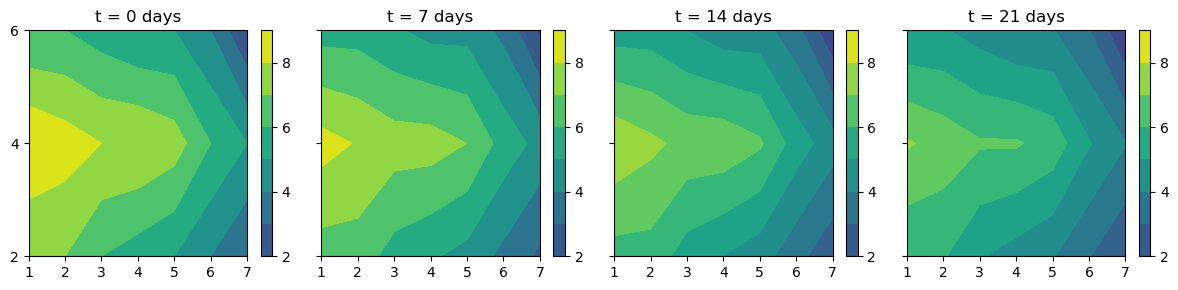

In [95]:
### YOUR CODE HERE ###

# Create the figure and subplots; set the figure size and 
fig,axs = plt.subplots(,,figsize=(),sharex=True,sharey=True)

# Plot the data; enter the correct inputs into contourf()
handle = axs[0].contourf(,,,vmin=0,vmax=9)
axs[1].contourf(,,,vmin=0,vmax=9)
axs[2].contourf(,,,vmin=0,vmax=9)
axs[3].contourf(,,,vmin=0,vmax=9)

# Set the x ticks and y ticks - you only need to do this for one of the axes!
axs[].set_xticks()
axs[].set_yticks()

# Set the title for each subplot
axs[].set_title()

# Add the colorbar - this has been done for you
c_ticks = [2,4,6,8]
fig.colorbar(mappable=handle,ticks=c_ticks,ax=axs[0])
fig.colorbar(mappable=handle,ticks=c_ticks,ax=axs[1])
fig.colorbar(mappable=handle,ticks=c_ticks,ax=axs[2])
fig.colorbar(mappable=handle,ticks=c_ticks,ax=axs[3])

plt.tight_layout()

#  Saving figures

Use `fig.savefig(fname, dpi=, facecolor=, bbox_inches='tight', **kwargs)`. 

Matplotlib supports a range of vector (e.g. pdf) and raster (e.g. png) formats. The resolution of raster images can be set with the dpi (dots per inch) argument. 
(Sometimes, vector quality is desirable for only some elements of a figure, while other parts can be rasterized to reduce the figure file size. In that case, [```Axes.set_rasterization_zorder```](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_rasterization_zorder.html) and the zorder plotting argument can be used to decide which figure elements should be rasterized.)

In [40]:
display(fig.canvas.get_supported_filetypes())

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

In [41]:
# Save our figure above
fig.savefig('MY_AWESOME_COMBINED_FIGURE.png', 
            # facecolor='white',
            transparent=True,
            bbox_inches='tight')

## References: 
* https://matplotlib.org/faq/usage_faq.html
* http://www.labri.fr/perso/nrougier/teaching/matplotlib/matplotlib.html
* NAO image: UCAR, https://www.windows2universe.org/?page=/earth/climate/images/nao_lg_gif_image.html 

![](../figures/meme_mpl.png)

([by @sanjanacurtis on twitter](https://twitter.com/sanjanacurtis/status/1362495499689951236/photo/1))

# Course Evaluation: Please fill out [this quick eval!](https://forms.office.com/Pages/ResponsePage.aspx?id=lYdfxj26UUOKBwhl5djwkFtIujJ9lCFMouysTWFV3rRUQTEwSlFIWFlCUlBGOFgzSzhYRkhOSUM5Ty4u)